In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

%matplotlib inline


/tmp/ipykernel_174219/3718783202.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
solar_df = pd.read_csv("run1.csv")

In [3]:
solar_df['DateTime'] = pd.to_datetime(solar_df['DateTime'])
solar_df['Time'] = solar_df['DateTime'] - solar_df['DateTime'].min()
solar_df['TimeMins'] = solar_df['Time'].dt.total_seconds() / 60

In [4]:
solar_df = solar_df.drop([0,1])

In [5]:
solar_df = solar_df.drop([53,54])

In [6]:
solar_df_averaged = solar_df.groupby(np.arange(len(solar_df)) // 3).mean()

In [7]:
solar_df2 = pd.read_csv("run2.csv")

In [8]:
solar_df2 = solar_df2.drop([0,1])

In [9]:
solar_df2['DateTime'] = pd.to_datetime(solar_df2['DateTime'])
solar_df2['Time'] = solar_df2['DateTime'] - solar_df2['DateTime'].min()
solar_df2['TimeMins'] = solar_df2['Time'].dt.total_seconds() / 60

In [10]:
solar_df2['PM2.5'] = pd.to_numeric(solar_df2['PM2.5'], errors='coerce')

In [11]:
solar_df_averaged2 = solar_df2.groupby(np.arange(len(solar_df2)) // 3).mean()

In [12]:
solar_df3 = pd.read_csv("run3.csv")

In [13]:
solar_df3 = solar_df3.drop([0,1, 23])

In [14]:
solar_df3['DateTime'] = pd.to_datetime(solar_df3['DateTime'])
solar_df3['Time'] = solar_df3['DateTime'] - solar_df3['DateTime'].min()
solar_df3['TimeMins'] = solar_df3['Time'].dt.total_seconds() / 60

In [15]:
solar_df3['PM2.5'] = pd.to_numeric(solar_df3['PM2.5'], errors='coerce')

In [16]:
solar_df_averaged3 = solar_df3.groupby(np.arange(len(solar_df3)) // 3).mean()

In [17]:
solar_df_averaged_concat = pd.concat([solar_df_averaged3, solar_df_averaged2, solar_df_averaged])
solar_df_concat = pd.concat([solar_df3, solar_df2, solar_df])

In [18]:
solar_df_rescaled = solar_df_concat

In [19]:
solar_df_concat = solar_df_concat.drop([2, 3, 4])

In [20]:
solar_df_concat = solar_df_concat.reset_index()

In [21]:
solar_df_concat = solar_df_concat.sort_values(by=['DateTime'])
solar_df_concat['power'] = solar_df_concat['irradiance']*(833/10000)


In [22]:
solar_df_rescaled['power'] = solar_df_rescaled['irradiance']*(833/10000)
solar_df['power'] = solar_df['irradiance']*(833/10000)
solar_df2['power'] = solar_df2['irradiance']*(833/10000)
solar_df3['power'] = solar_df3['irradiance']*(833/10000)

In [23]:
theoretical_df = pd.DataFrame({'samplerate': [0.08, 3.96, 7.85, 11.74, 15.62, 19.51], 'power': [0.5, 25.5, 50.5, 75.5, 100.5, 125.5]})

In [30]:
solar_df_concat = solar_df_concat.reset_index()

In [33]:
max_frequency = []
for index, row in solar_df_concat.iterrows():
    effective_solar_cell_power_production_mW = row['power'] * (95 / 100)
    effective_sensor_power_mw = effective_solar_cell_power_production_mW * (90/100)
    available_hourly_energy = effective_sensor_power_mw * 3.6
    frequency = available_hourly_energy/float(3.96*5)
    max_frequency.append(frequency)

In [36]:
solar_df_concat['theoreticalsamplerate'] = max_frequency

In [38]:
solar_df_concat['samplerate'].corr(solar_df_concat['theoreticalsamplerate'])

0.28130399730206923

In [39]:
solar_df_concat_filtered = solar_df_concat[solar_df_concat['power']<60]

In [42]:
solar_df_concat_filtered['samplerate'].corr(solar_df_concat_filtered['theoreticalsamplerate'], method='pearson')

0.5472607306803482

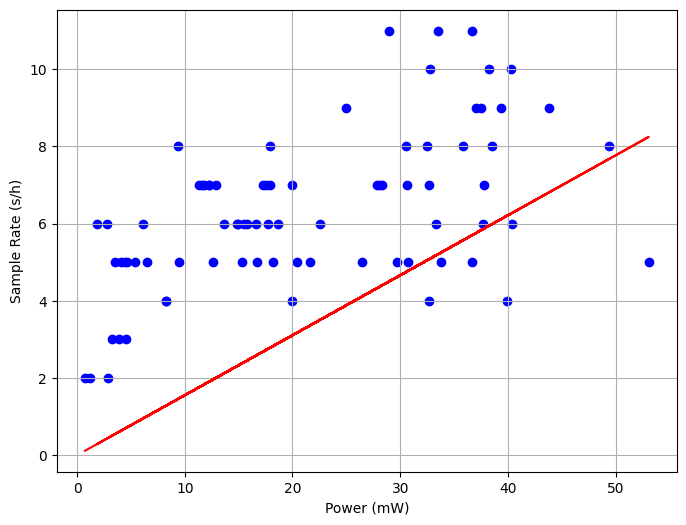

In [41]:
# Scatter plot of 'irradiance' vs 'samplerate'

plt.figure(figsize=(8, 6))
plt.scatter(solar_df_concat_filtered['power'], solar_df_concat_filtered['samplerate'], color='blue', marker='o')
plt.plot(solar_df_concat_filtered['power'], solar_df_concat_filtered['theoreticalsamplerate'], color='red')

# Adding labels and title
plt.xlabel('Power (mW)')
plt.ylabel('Sample Rate (s/h)')
#plt.title('Scatter Plot of Power vs Samplerate')

# Display the plot
plt.grid(True)
plt.show()



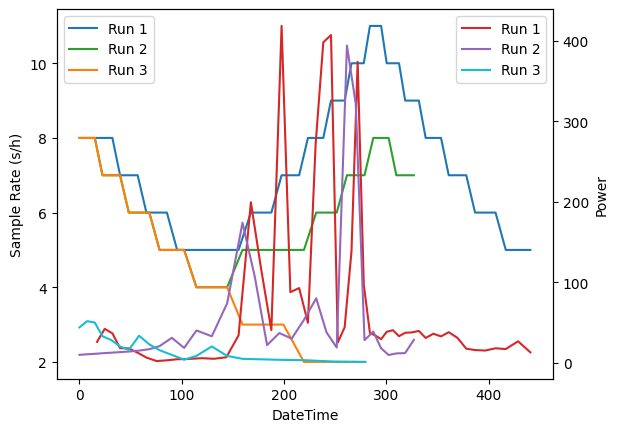

In [25]:
fig, ax1 = plt.subplots()

# Plot the 'samplerate' on the first y-axis.
ax1.plot(solar_df['TimeMins'], solar_df['samplerate'], color='tab:blue', label='Run 1')
ax1.plot(solar_df2['TimeMins'], solar_df2['samplerate'], color='tab:green', label='Run 2')
ax1.plot(solar_df3['TimeMins'], solar_df3['samplerate'], color='tab:orange', label='Run 3')
ax1.set_xlabel('DateTime')  # Set the X axis label
ax1.set_ylabel('Sample Rate (s/h)')
ax1.tick_params(axis='y')



# Create a second y-axis sharing the same x-axis.
ax2 = ax1.twinx()

# Plot the 'power' on the second y-axis.
ax2.plot(solar_df['TimeMins'], solar_df['power'], color='tab:red', label='Run 1')
ax2.plot(solar_df2['TimeMins'], solar_df2['power'], color='tab:purple', label='Run 2')
ax2.plot(solar_df3['TimeMins'], solar_df3['power'], color='tab:cyan', label='Run 3')
ax2.set_ylabel('Power')
ax2.tick_params(axis='y')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

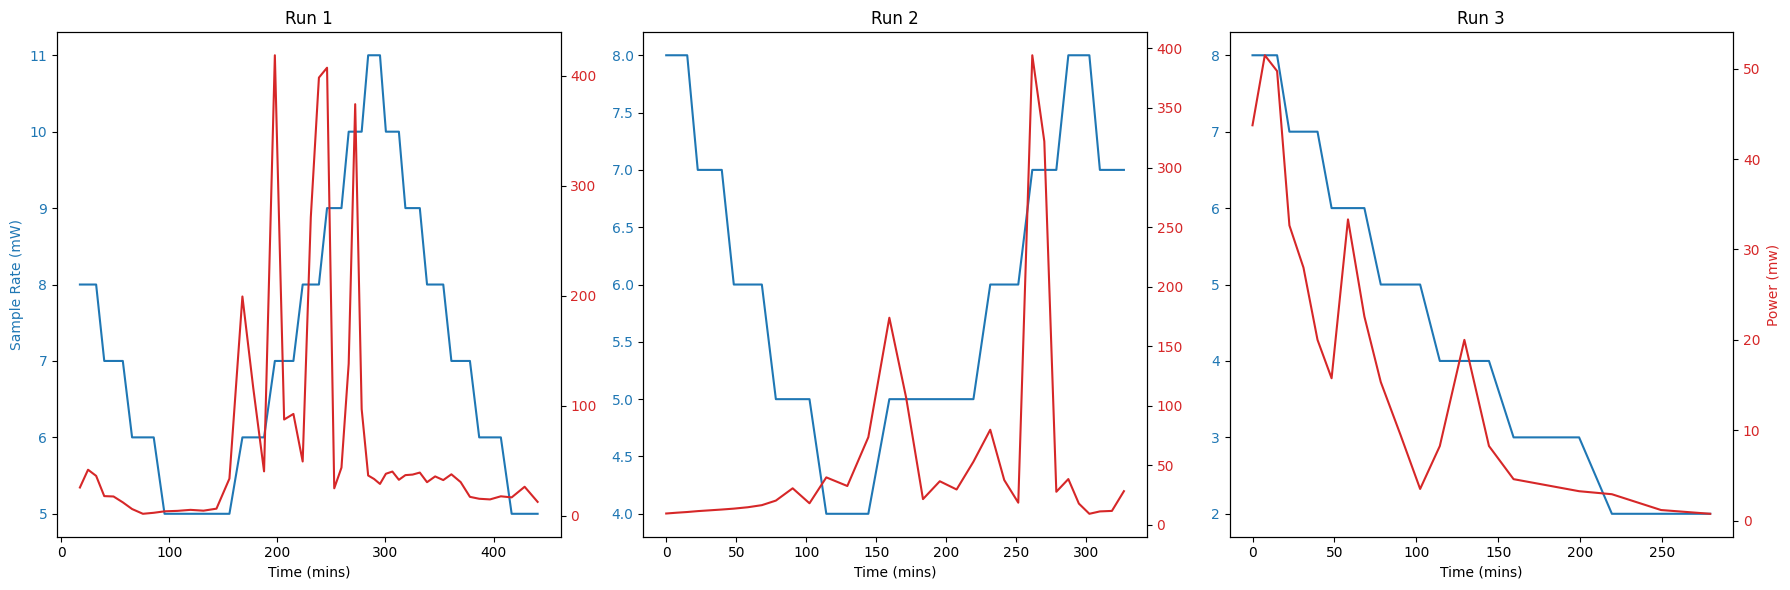

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'solar_df', 'solar_df2', and 'solar_df3' are your DataFrames
# with 'DateTime', 'samplerate', and 'power' columns.
# Make sure 'DateTime' is a datetime type.

# Create a figure and three subplots horizontally.
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6), sharey=False)

# Plot for solar_df on ax1
ax1.plot(solar_df['TimeMins'], solar_df['samplerate'], color='tab:blue', label='Samplerate')
ax1.set_xlabel('Time (mins)')
ax1.set_ylabel('Sample Rate (mW)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second Y-axis for power
ax1_2 = ax1.twinx()
ax1_2.plot(solar_df['TimeMins'], solar_df['power'], color='tab:red', label='Power')
ax1_2.tick_params(axis='y', labelcolor='tab:red')
ax1.set_title('Run 1')

# Plot for solar_df2 on ax2
ax2.plot(solar_df2['TimeMins'], solar_df2['samplerate'], color='tab:blue', label='Samplerate')
ax2.set_xlabel('Time (mins)')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Create the second Y-axis for power
ax2_2 = ax2.twinx()
ax2_2.plot(solar_df2['TimeMins'], solar_df2['power'], color='tab:red', label='Power')
ax2_2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_title('Run 2')

# Plot for solar_df3 on ax3
ax3.plot(solar_df3['TimeMins'], solar_df3['samplerate'], color='tab:blue', label='Samplerate')
ax3.set_xlabel('Time (mins)')
ax3.tick_params(axis='y', labelcolor='tab:blue')

# Create the second Y-axis for power
ax3_2 = ax3.twinx()
ax3_2.plot(solar_df3['TimeMins'], solar_df3['power'], color='tab:red', label='Power')
ax3_2.set_ylabel('Power (mw)', color='tab:red')
ax3_2.tick_params(axis='y', labelcolor='tab:red')
ax3.set_title('Run 3')

# Adjust layout to prevent overlap and show the plot.
plt.tight_layout()
plt.savefig('runs.png')
plt.show()

